### Imports

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

### Raw Data

In [3]:
raw_data = pd.read_csv("../data/raw_data.csv")
raw_data

,id,target_chr,target_start,target_end,target_strand,target_sequence,target_context,target_geneid,grna_target_chr,grna_target_start,grna_target_end,grna_target_strand,grna_target_sequence,genome,cell_line,cleavage_freq,epigen_ctcf,epigen_dnase,epigen_rrbs,epigen_h3k4me3,epigen_drip,energy_1,energy_2,energy_3,energy_4,energy_5,study_name,whole_genome,delivery_mode
0,0,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,ATTCTAAACTGTACCCTGTTACTTATCCCCTTCCTATGACATGAAC...,HBB,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,7.875890e-01,0.0,0.0,0.0,0.0,0.0,22.650,20.146794,20.146794,31.050,31.050,Kim,0,2
1,1,chr1,38230662.0,38230684.0,-,CTCTGTCTCGCGCTGCTTTTGGG,AGAGGCTGCAAGTGTTGCTGCCTCCCCGAGGGTCGCCCCTCCTTAA...,EPHA10,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,3.840000e-04,0.0,0.0,0.0,0.0,0.0,-17.665,-51.262216,-51.262216,-9.265,-9.265,Kim,0,2
2,2,chr1,177593963.0,177593985.0,+,TCTACCCCACATGGCAGTAATGG,ATTTTTTATAGCTGGGGAGGTATTAGAGGAAAGACAGAACTGTACT...,NaN,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,3.050000e-04,0.0,0.0,0.0,0.0,0.0,13.760,6.245204,6.245204,22.160,22.160,Kim,0,2
3,3,chr1,191839001.0,191839023.0,+,CCATAGCACTCTTTAAAAAAAGC,ACAAACATAACACATATATATCTACACAGACAGACAAAAGATTCAG...,RP11-541F9.1,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-19.275,0.000000,-46.939290,0.000,-10.875,Kim,0,2
4,4,chr2,91869704.0,91869726.0,+,CTTACCTCACAGGGCAGTGAGAG,CCTTGGACAAACAACCTTGTCCTCAAGGTCCTCTGTGCCCCCATGT...,NaN,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,4.800000e-05,0.0,0.0,0.0,0.0,0.0,11.610,2.751414,3.057127,18.009,20.010,Kim,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25627,25627,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGT,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,9.614866e-20,0.0,0.0,0.0,0.0,0.0,24.400,0.000000,18.270788,0.000,26.900,Finkelstein,0,2
25628,25628,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTTA,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,5.104533e-17,0.0,0.0,0.0,0.0,0.0,24.400,0.000000,18.270788,0.000,26.900,Finkelstein,0,2
25629,25629,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTTC,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,1.125790e-19,0.0,0.0,0.0,0.0,0.0,24.400,0.000000,18.270788,0.000,26.900,Finkelstein,0,2
25630,25630,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTTG,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,7.712115e-06,0.0,0.0,0.0,0.0,0.0,24.400,0.000000,18.270788,0.000,26.900,Finkelstein,0,2


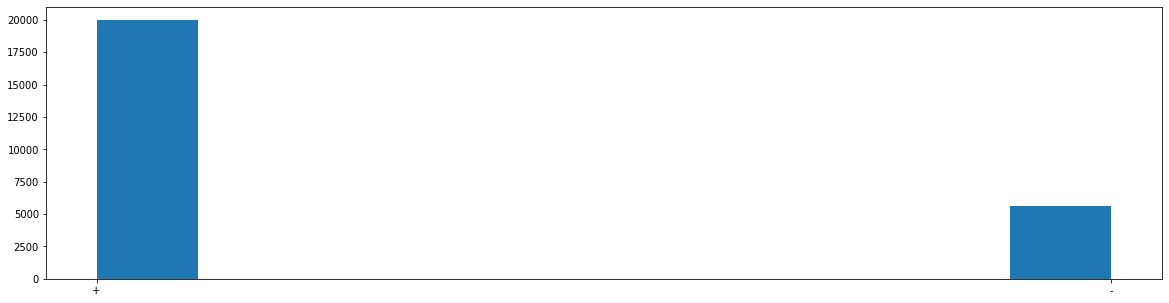

In [4]:
target_strands = raw_data.target_strand
fig = plt.figure(figsize = (20, 5))
plt.hist(target_strands)
plt.show()

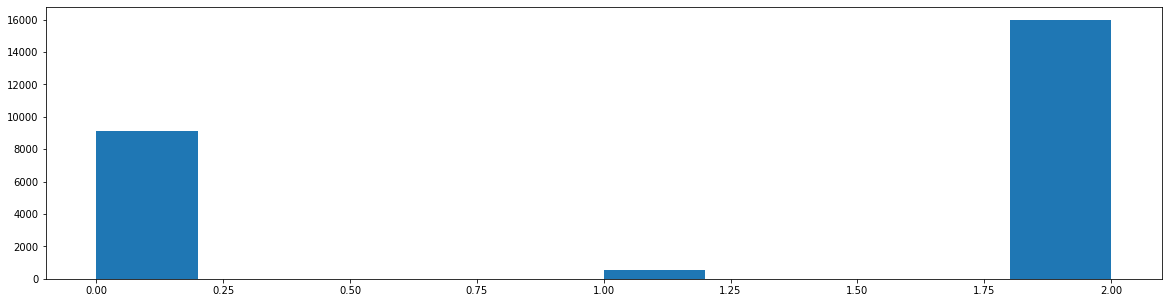

In [5]:
delivery = raw_data.delivery_mode
fig = plt.figure(figsize = (20, 5))
plt.hist(delivery)
plt.show()

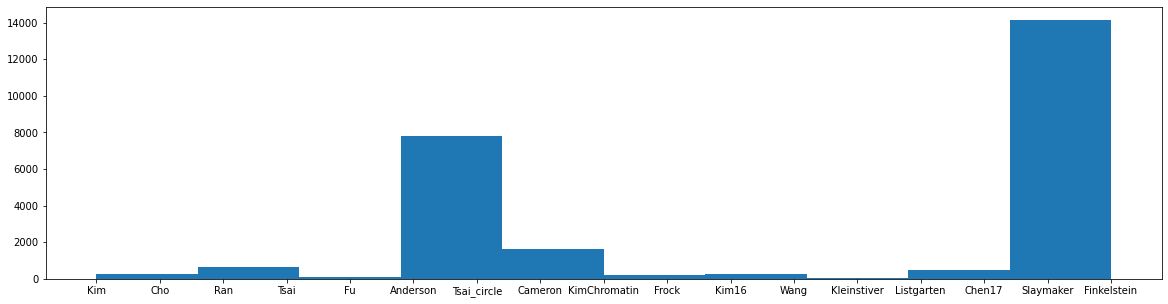

In [6]:
studies = raw_data.study_name
fig = plt.figure(figsize = (20, 5))
plt.hist(studies)
plt.show()

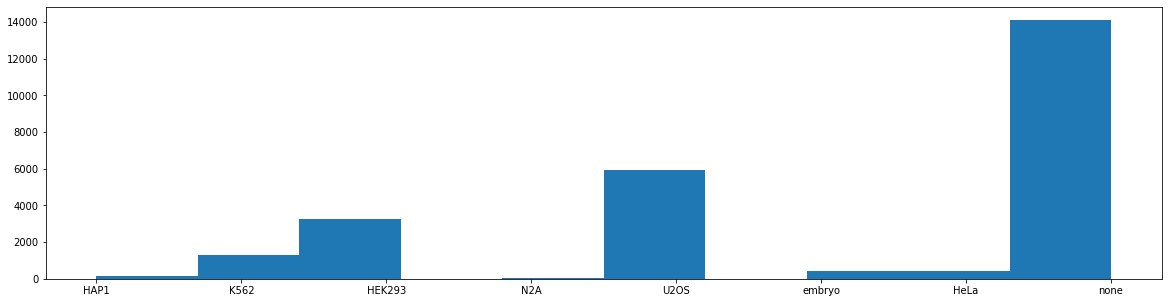

In [7]:
cells = raw_data.cell_line.fillna('none')
fig = plt.figure(figsize = (20, 5))
plt.hist(cells)
plt.show()

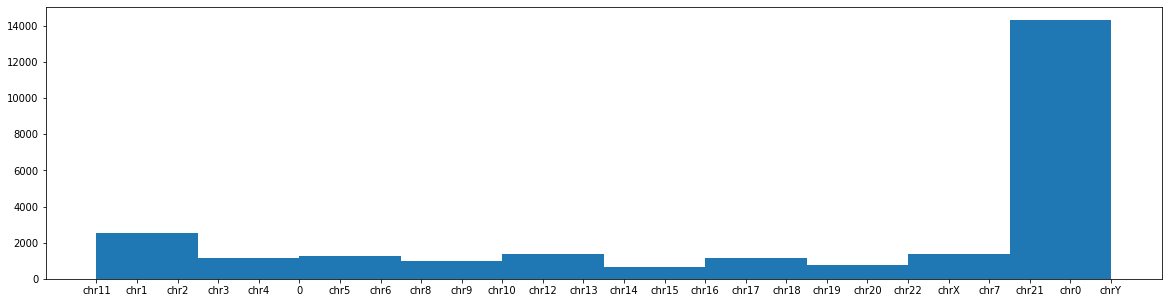

In [8]:
target_chromosome = raw_data.target_chr.fillna("chr0")
target_chromosome = target_chromosome.dropna()
fig = plt.figure(figsize = (20, 5))
plt.hist(target_chromosome)
plt.show()

In [9]:
gRNASeq = raw_data[["grna_target_sequence", "study_name"]].drop_duplicates()
gRNASeq

,grna_target_sequence,study_name
0,CTTGCCCCACAGGGCAGTAACGG,Kim
76,GGGTGGGGGGAGTTTGCTCCTGG,Kim
162,TGACATCAATTATTATACATCGG,Cho
176,GAATCCTAAAAACTCTGCTTCGG,Cho
190,GACACCGAAGCAGAGTTTTTAGG,Cho
...,...,...
11480,GGTGAGTGAGTGTGTGCGTGTGG,Chen17
11493,GGTGAGTGAGTGTGTGCGTGTGG,Slaymaker
11519,GAGTCCGAGCAGAAGAAGAAGGG,Slaymaker
11524,GACGCATAAAGATGAGACGCTGG,Finkelstein


In [10]:
raw_data["cleavage_freq"].dropna()

0        7.875890e-01
1        3.840000e-04
2        3.050000e-04
3        0.000000e+00
4        4.800000e-05
             ...     
25627    9.614866e-20
25628    5.104533e-17
25629    1.125790e-19
25630    7.712115e-06
25631    1.490279e-22
Name: cleavage_freq, Length: 25554, dtype: float64

In [11]:
raw_data[raw_data['grna_target_sequence'].str.len() != raw_data['target_sequence'].str.len()].dropna()

,id,target_chr,target_start,target_end,target_strand,target_sequence,target_context,target_geneid,grna_target_chr,grna_target_start,grna_target_end,grna_target_strand,grna_target_sequence,genome,cell_line,cleavage_freq,epigen_ctcf,epigen_dnase,epigen_rrbs,epigen_h3k4me3,epigen_drip,energy_1,energy_2,energy_3,energy_4,energy_5,study_name,whole_genome,delivery_mode
290,290,chr1,22031858.0,22031877.0,+,AATTGTCTGAAGCCTGGCCAGG,ACTGAATGGTAACACACATTTGCTTACTGGTGTATTTTCCTGGAAG...,USP48,chr2,73161171.0,73161193.0,-,GGCCTCCCCAAAGCCTGGCCAGG,hg19,HEK293,0.000020,0.000,0.0,0.0,0.014,0.0,7.660,-7.000080,-7.000080,10.560,10.560,Ran,0,1
298,298,chr5,172300612.0,172300631.0,+,TGGGGAGCTTTGGGGAGGCCGG,TTTTTATCCGATGATGGGCCACTTTTGAAAAACCCCGCTCATGCTC...,ERGIC1,chr2,73161174.0,73161196.0,+,GGCCAGGCTTTGGGGAGGCCTGG,hg19,HEK293,0.000100,0.000,0.0,0.0,0.009,0.0,-7.520,-35.848117,-35.848117,-0.820,-0.820,Ran,0,1
301,301,chr16,88818445.0,88818464.0,+,CCTGAGGCTGTGGGGAGGCCGG,TCCCCCAGCTCCCCCAGGAGCCCTCCCTGAAGTTAAGATCCCCTCT...,PIEZO1,chr2,73161174.0,73161196.0,+,GGCCAGGCTTTGGGGAGGCCTGG,hg19,HEK293,0.000020,0.000,0.0,0.0,0.009,0.0,-12.425,-44.742577,-44.742577,-5.725,-5.725,Ran,0,1
305,305,chr5,105649.0,105668.0,+,GGCAGTGGTTTGGGGAGGCCGG,ACAGTGCACAGTGGGTGAGGGCTGTTCTGGTTCTGGTGTTCCCGTC...,PLEKHG4B,chr2,73161174.0,73161196.0,+,GGCCAGGCTTTGGGGAGGCCTGG,hg19,HEK293,0.000240,0.000,0.0,0.0,0.005,0.0,-7.065,-35.531597,-35.531597,-0.365,-0.365,Ran,0,1
313,313,chr9,93629455.0,93629474.0,+,TCCTTCCCAAAGCCTGGCCAGG,CATACGGGAAAAAAAAGGCATACGCCCTATGTGTACAACTCAATTA...,SYK,chr2,73161171.0,73161193.0,-,GGCCTCCCCAAAGCCTGGCCAGG,hg19,HEK293,0.000600,0.000,0.0,0.0,0.005,0.0,22.330,13.095817,13.095817,25.230,25.230,Ran,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918,5918,chr7,101055359.0,101055382.0,-,CACCACCTCTACCCCAGCCTCAGG,TCATTACAACCTCCGCCTCCCAGGTTCAAGGGGTTCTCCTGTCTCA...,COL26A1,chr6,43738556.0,43738578.0,-,GACCCCCTCCACCCCGCCTCCGG,hg19,U2OS,0.000050,0.000,0.0,0.0,0.000,0.0,8.180,-18.924621,-18.924621,8.180,8.180,Tsai_circle,1,0
5972,5972,chr14,93525558.0,93525581.0,-,CACACCCTCCACCCCTGCCTCGAG,GACCCGCACCCCCTCCACCCCTGCCTCGTGACCCGCACCCCCTCCA...,ITPK1,chr6,43738556.0,43738578.0,-,GACCCCCTCCACCCCGCCTCCGG,hg19,U2OS,0.000043,0.076,0.0,0.0,0.000,0.0,10.660,-13.534108,-15.037898,9.594,10.660,Tsai_circle,1,0
7196,7196,chr21,35765458.0,35765481.0,-,TGTGAGTGATGTGTGTGTGTGCGG,AAGGCCCACCCAGGCAGAAGCGCAAGTGGACCAAGCCTACCGCTGA...,SMIM11A,chr6,43737454.0,43737476.0,+,GGTGAGTGAGTGTGTGCGTGTGG,hg19,U2OS,0.000305,0.025,0.0,0.0,0.000,0.0,6.610,-18.019131,-18.019131,6.610,6.610,Tsai_circle,1,0
8022,8022,chr21,47639252.0,47639275.0,-,GGGTGGGTGGAGTTAGGCTCCTGG,CTTCCTGGGGCCAGGGGTTGCAAACACCTCTCCTGGGGCTGGACAC...,LSS,chr6,43737291.0,43737313.0,-,GGGTGGGGGGAGTTTGCTCCTGG,hg19,U2OS,0.000872,0.052,0.0,0.0,0.000,0.0,5.000,-21.000482,-21.000482,8.600,8.600,Tsai_circle,1,0


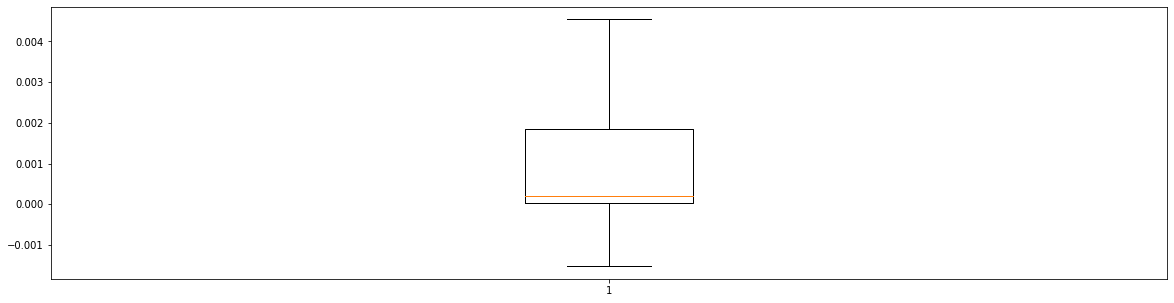

In [12]:
activity = raw_data.cleavage_freq.dropna()
fig = plt.figure(figsize = (20, 5))
plt.boxplot(activity, showfliers=False)
plt.show()

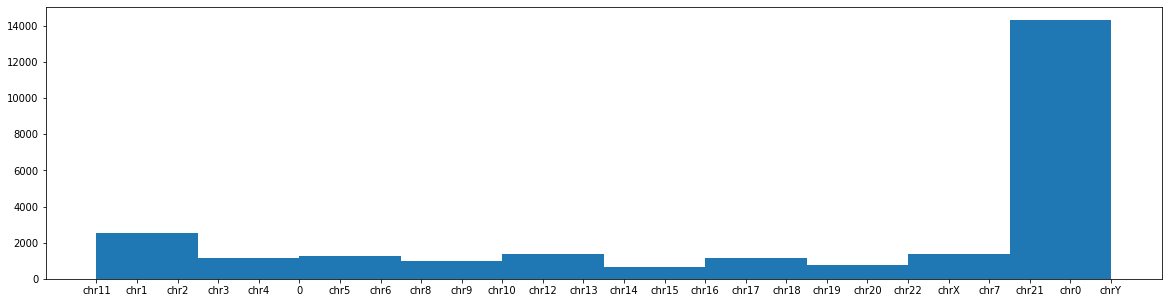

In [13]:
target_chromosome = raw_data.target_chr.fillna("chr0")
target_chromosome = target_chromosome.dropna()
fig = plt.figure(figsize = (20, 5))
plt.hist(target_chromosome)
plt.show()

In [15]:
activity[activity > 0.2]

0        0.787589
31       0.857651
108      0.873003
142      0.793822
162      0.602074
           ...   
25341    0.804676
25599    0.727046
25606    0.847845
25613    0.693183
25626    0.987475
Name: cleavage_freq, Length: 894, dtype: float64

In [16]:
activity.shape

(25554,)